# Data Visualization with Python

# The script below contains different charts for IC analysis

# Import visualization libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import dataframe and check dimensions

In [2]:
# Create path variable

path= r'C:\Users\babum\Desktop\CF_Data Analytics\Data Immersion\Achievement 4\02-2023 Instacart Basket Analysis'

In [3]:
# Import dataframe

ords_prods_all = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Check the dimensions

ords_prods_all.shape

(32404859, 31)

# Creating Bar Chart & Exporting the chart

<AxesSubplot:>

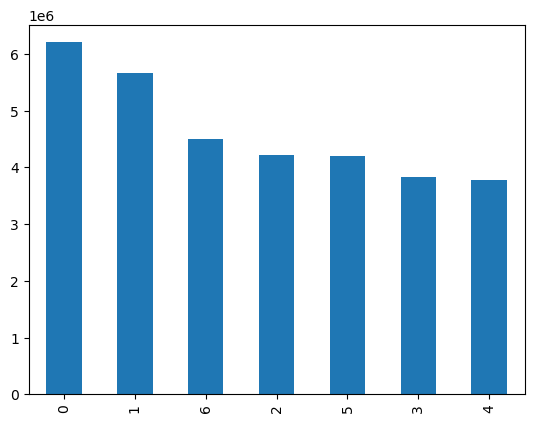

In [5]:
#Creating bar chart 

ords_prods_all['orders_day_of_week'].value_counts().plot.bar()

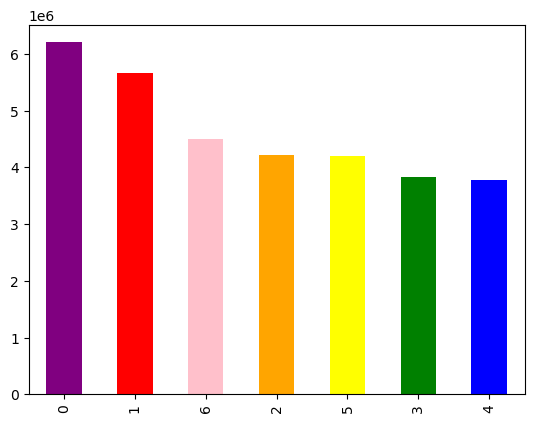

In [6]:
# Sorting the index and giving color to the bars

bar = ords_prods_all['orders_day_of_week'].value_counts().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

In [7]:
# Exporting the chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Creating a histogram & Exporting the chart

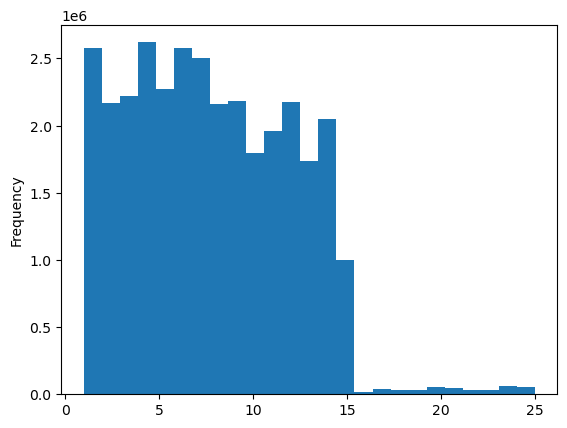

In [8]:
# Creating a histogram on prices

hist = ords_prods_all['prices'].plot.hist(bins = 25)

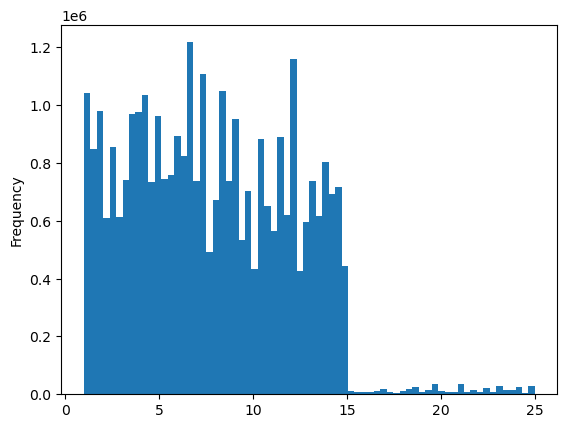

In [9]:
hist_2 = ords_prods_all['prices'].plot.hist(bins = 70)

In [10]:
# Exporting the chart

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [11]:
# Exporting the chart

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_2_prices_70_bins.png'))

# Creating Scatterplot

<AxesSubplot:xlabel='prices', ylabel='prices'>

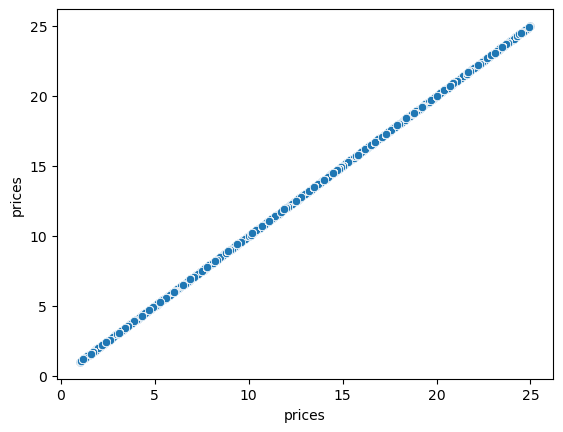

In [12]:
# Creating scatterplot of price column to check for outliers

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_all)

# Sampling Data

In [13]:
# Splitting the dataframe at a 70/30 ratio

np.random.seed(4)
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [14]:
len(ords_prods_all)

32404859

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [17]:
# Store 70% of the sample in the dataframe big

big = ords_prods_all[dev]

In [18]:
# Store 30% of the sample in the dataframe small

small = ords_prods_all[~dev]

In [19]:
len(big)+len(small)

32404859

In [20]:
#Reducing the samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week”

df_2 = small[['orders_day_of_week','prices']]

# Creating a line chart & Exporting the chart

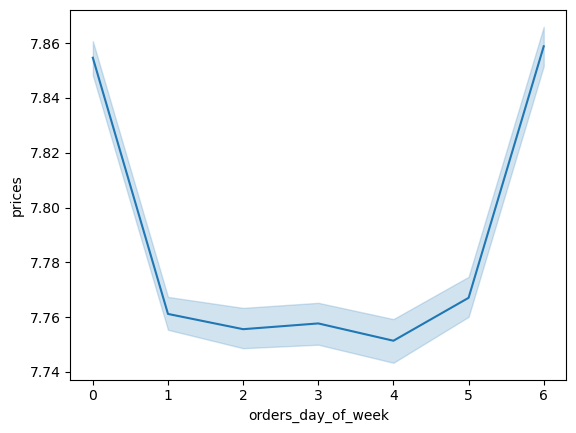

In [21]:
#Creating line chart of prices and orders_day_of_week column

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [22]:
# Exporting the chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_orders_dow.png'))

# Task 4.9 Part 2

# 3. Provide the Instacart senior stakeholders with descriptive findings about sales by creating a histogram

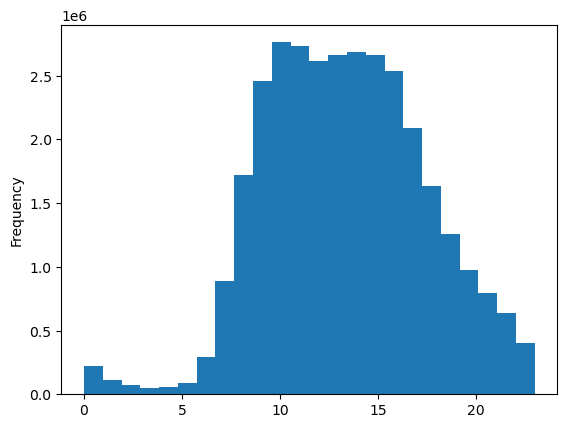

In [35]:
# Create histogram for order_hour_of_day column

hist_order_hour = ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)

# The chart above shows the peak hours of sales in InstaCart. The peak sales happens between 10 am to 6 pm. The slowest sales is from 12 am - 7 am. There is sales happening throughout the day for IC. 

# 4. Creating a bar chart for the marketing team to know about the distribution of orders among customers in terms of loyalty.

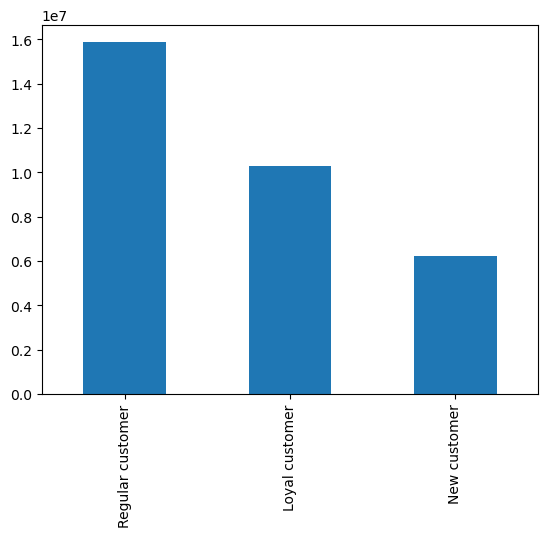

In [34]:
# Create bar chart for "loyalty_flag" column

bars_loyalty = ords_prods_all['loyalty_flag'].value_counts().plot.bar()

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day using line chart

# Sampling data

In [25]:
#Reducing the samples to only those columns necessary for the chart, namely “prices” and “order_hour_of_day”

df_3 = small[['order_hour_of_day','prices']]

# Creating line chart

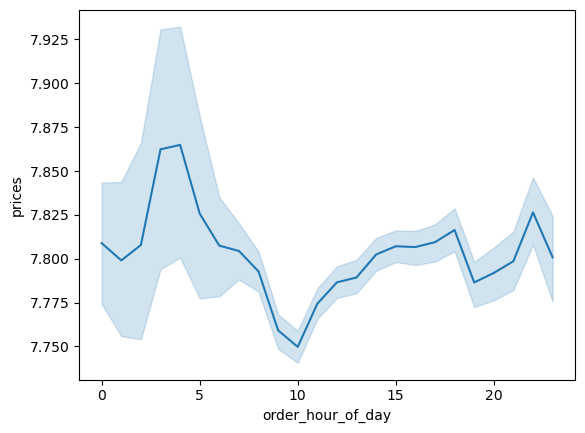

In [26]:
# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day by creating a line chart

line_order_hour = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

# During the peak hour sales the prices of the purchased items are low. This might be due to these purchases might be the regular purchases made by the regular customers. The items purchased during the slowest sales hour is high.

In [27]:
ords_prods_all.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_days_prior_order', 'order_frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'num_of_dependants',
       'family_status', 'income', '_merge'],
      dtype='object')

# 6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [28]:
#Reducing the samples to only those columns necessary for the chart, namely “age” and “num_of_dependants”

df_4 = small[['age','num_of_dependants']]

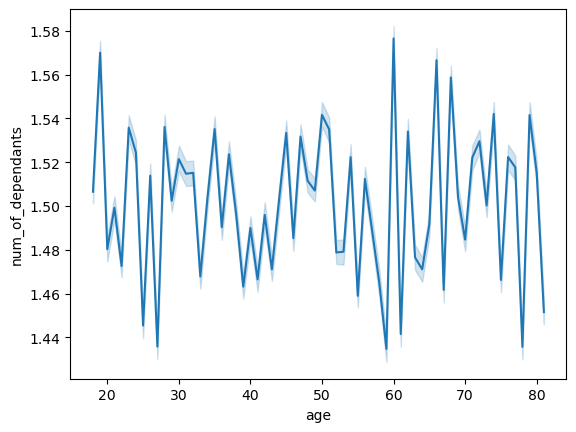

In [29]:
# Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between "age" and "num_of_dependants"

line_age_dep = sns.lineplot(data = df_4, x = 'age',y = 'num_of_dependants')

# The line chart above shows that there is no significant connection between age and number of dependants. 

In [30]:
ords_prods_all['num_of_dependants'].value_counts()

3    8135109
0    8097503
2    8091143
1    8081104
Name: num_of_dependants, dtype: int64

# 7. Explore whether there’s a connection between age and spending power using scatterplot

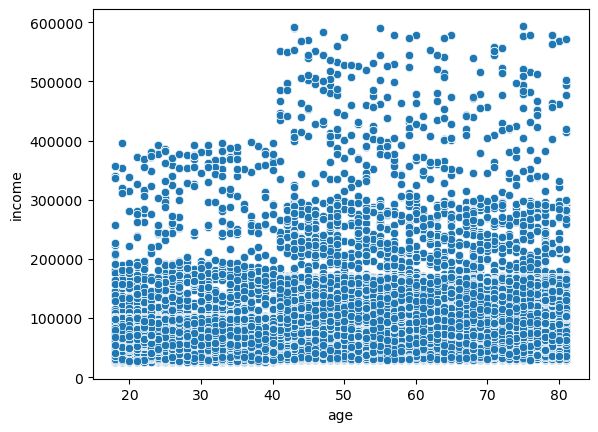

In [31]:
# Explore whether there’s a connection between age and spending power

scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_all)

# As the age increases there is an increase in the income. The age group above 40 have the highest spending power.

# 8. Export the visualization

In [39]:
# Histogram chart

hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour.png'))

In [40]:
# Bar chart

bars_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bars_loyalty.png'))

In [41]:
# Line order_hour chart

line_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour.png'))

In [42]:
# Line age_dep chart

line_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dep.png'))

In [43]:
# Scatterplot 

scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))